# 1. pandas 라이브러리 import 하기

In [35]:
!pip install pandas

In [36]:
!pip install matplotlib

In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame # pandas  자료구조
import matplotlib.pyplot as plt #판다스에서 제공해주는 시각화

In [38]:
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 폰트 변경 정보 폰트 깨짐 방지(맑은 고딕)

# 2. Series  
    * 일련의 객체를 담을 수 있는 1차원 데이터(스칼라, 리스트, 튜플, 사전) 벡터 같은 자료구조
    * 파이썬의 일차원 데이터를 저장, 처리, 분석을 위한 다양한 기능들을 제공
    * 인덱스와 값으로 구성


## 2.1 Series 생성


### 1) List를 사용하여 Series 생성

In [39]:
data = [4,7,-5,3] #파이썬의 리스트  타입 변수
obj = pd.Series(data) # Series([4,7,-5,3])
obj # 시리즈 객체 : 색인(0부터 시작)과 데이터

0    4
1    7
2   -5
3    3
dtype: int64

In [41]:
np.random.seed(1)
sr = Series(np.random.randn(50))
sr

0     1.624345
1    -0.611756
2    -0.528172
3    -1.072969
4     0.865408
        ...   
45   -0.636996
46    0.190915
47    2.100255
48    0.120159
49    0.617203
Length: 50, dtype: float64

In [42]:
# OR
obj.index
# 색인 이름 변경 
obj.index = ["d", "b", "a", "c"]# 리스트 안에 담아서 색인 이름 변경
obj
# 인댁싱 색인 이름 검색
# obj["d"] # 검색 할때 [] 사용
# obj[1] # 검색은 가능함

d    4
b    7
a   -5
c    3
dtype: int64

In [43]:
# 색인 지정(2) 한줄에서 지정하는 것 많이 씀
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"]) 
obj2 # 결과 값 출력 
# obj2.index # 지정된 인덱스 확인 및 데이터 타입

d    4
b    7
a   -5
c    3
dtype: int64

In [44]:
# 시리즈의 값 검색 -- 인덱싱
# 단일된 값 또는 여러 개의 값을 선택할 때 색인으로 레이블을 사용
print(obj2)
obj2["a"] # 색인  a에 저장된 값을 보는 것
obj2["d"] = 6 #기존에 저장된 값을 바꾸는 것 4->6으로 변경
obj2["d"]
s2 = obj2[["c", "a", "d"]] # 여러 개의 색인을 사용할 경우 리스트에 담아서 처리 밖은 인덱스 안은 리스트 #s2는 시리즈
s2
# type(s2) # 내장 함수 type 추출해도 똑같음

d    4
b    7
a   -5
c    3
dtype: int64


c    3
a   -5
d    6
dtype: int64

In [45]:
# 시리즈의 값 검색 --- 조건색인(boolean indexing)!!!
#1. 조건식
print(obj2)
cond = obj2 > 0 # 조건식 비교연산자 (>) 사용  #양수를 불이언 시리즈 만듦 # true 또는 false로 표시 인덱스의 값은 변환되지 않음
cond
#2. 조건식을 적용하기 위해 인덱식
obj3 = obj2[obj2 > 0] # 조건부 색인 : 불리언 배열을 사용하여 값을 걸러내기 -> 불리언 인덱식이라고 말함 인덱싱을 해서 obj3에 저장
obj3 # 출력을 의미함

d    6
b    7
a   -5
c    3
dtype: int64


d    6
b    7
c    3
dtype: int64

In [46]:
# 시리즈 간에 연산: 시리즈 * 스칼라 -> 새로운 시리즈 생성(broadcasting)
obj2 * 2 # 행렬 스칼라 연산 모든 인덱싱에 있는 값을 곱한다고 생각하면 됨

d    12
b    14
a   -10
c     6
dtype: int64

In [47]:
"b" in obj2 # 인덱스 존재 유무 확인 in-> 예약어
"e" in obj2 #없으면 False가 나옴

False

### 2) Tuple을 이용하여 Series 생성하기

In [48]:
arr = (3,4,1,2) # tuple 타입
data2 = pd.Series(arr, index = ['one', 'tow', 'three' , 'four']) #인덱싱 값 변경
data2

one      3
tow      4
three    1
four     2
dtype: int64

### 3) Dict을 이용하여 Series 생성하기

In [49]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000} # 딕션어리의 keys 값으로 적용됨
sdata.keys()
sdata.values()# 숫자 값만
sdata.items()# 둘다 뽑음
obj3 = pd.Series(sdata) # Series  객체의 색인은 딕셔너리의 keys 메서드에서 반환하는 키의 값 순서대로 들어감
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

## ** 몇 가지  Series 특징들 **
* Series.values 는 numpy의 ndarray(n차원 배열) 객체 뒤에 있는 숫자 값

In [50]:
type(obj3)
obj3.values # 숫자 값과 데이터 값 int64로 변경
type(obj3.values)

numpy.ndarray

* 값에는 모든 데이터 타입 사용이 가능

In [51]:
obj3.to_dict() # series -> python dictionary 변환 숫자에서 다시 dict으로 변경
type(obj3)

pandas.core.series.Series

## 2.2 Series의 주요 속성 및 메서드 (p.199)

* index - Series의 인덱스(혹은 인덱스 라벨)
* index - Series의 값(numpy.ndarry)

In [52]:
#변수 이용해서 집어 넣기
obj3
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000} # dict를 사용함 # utah는 빠짐 -> 인덱싱을 생성 할때 없어서 즉, keys 값이 없음을 의미
# states = ["California", "Ohio", "Oregon", "Texas"] 
obj4 = pd.Series(sdata, index=["Fox", "California", "Ohio", "Oregon", "Texas"])
obj4
#새로 생성 했을 때 값이 없으면 NaN
#결속치 : NaN (Not a Number) -> 속성은 있으나 비어있는 값

Fox               NaN
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [53]:
obj4.index

Index(['Fox', 'California', 'Ohio', 'Oregon', 'Texas'], dtype='object')

* values - Series의 데이터

In [54]:
obj4.values # 값을 의미함 즉, 실질적인 숫자

array([   nan,    nan, 35000., 16000., 71000.])

* size - Series의 크기(데이터의 길이) 

In [55]:
obj4.size #size -> 속성을 의미함 시리즈 안에 저장된 데이터의 값 즉, 데이터의 길이

5

* dtype - Series의 데이터(Series.values)의 데이터 타입
  * int64
  * float64
  * object - 문자열이거나 2개 이상의 데이터 타입으로 이루어진 경우

In [56]:
obj4.dtype

dtype('float64')

In [57]:
s3 = Series([2,3.5,'abc'])# 혼합된 값의 경우 오브젝트로 나옴
s3.values
s3.item
#s3.dtype

<bound method IndexOpsMixin.item of 0      2
1    3.5
2    abc
dtype: object>

* describe() - 통계 정보를 한 눈에 제공해주는 함수

In [58]:
obj4.describe()# 사용시 점 표기

count        3.000000
mean     40666.666667
std      27934.447074
min      16000.000000
25%      25500.000000
50%      35000.000000
75%      53000.000000
max      71000.000000
dtype: float64

* 통계함수 - max(), min(), mean()..  # 시리즈에서 제공

In [59]:
obj4 #육안으로 보기 어려우니 내장된 함수 사용
obj4.max() # 최대값 max()

71000.0

In [60]:
obj4.mean()

40666.666666666664

In [61]:
obj4.min()

16000.0

* isna() - 누락된 데이터를 찾을 때 불리언 배열을 반환 -> na는 결측치를 의미함 누락된 것을 불리언으로 반환
* notna() -누락되지 않은 데이터을 찾을 때 불리언 배열로 반환

In [518]:

data213 = {'name': ['철수', '영희', None, '지영'], 'score': [75, 88, None, 68]}
df = pd.DataFrame(data213)
result213 = df.isna()
print(result213)
type(result213)

    name  score
0  False  False
1  False  False
2   True   True
3  False  False


pandas.core.frame.DataFrame

In [513]:
obj4 #california가 NaN임
pd.notna(obj4)
# obj4.isna() 누락된 값을 true로 출력
# 여기서 누락된 값이란 NAN겂을 의미한다. 결측치를 의미하는것
# California        NaN
# Ohio          35000.0
# Oregon        16000.0
# Texas         71000.0
#pd.notna(obj4) 
# 누락 되지 않은 값을 true로 출력
# Fox           False
# California    False
# Ohio           True
# Oregon         True
# Texas          True
# dtype: bool

state
Fox           False
California    False
Ohio           True
Oregon         True
Texas          True
Name: population, dtype: bool

* value_counts() - Series에 있는 데이터 값들의 개수

In [63]:
print(obj4)
obj4.value_counts() #NaN은 출력되지 않음

Fox               NaN
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


35000.0    1
16000.0    1
71000.0    1
Name: count, dtype: int64

* add(값) - Series의 데이터 각각에 값을 더하기

In [64]:
print(obj3)
print(obj4)
obj3 + obj4 #시리즈간 연산 가능 만약 대응하는 값이 없을 경우 NaN으로 출력

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
Fox               NaN
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


California         NaN
Fox                NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [65]:
print(obj4)
obj3.add(obj4)#시리즈.add(시리즈) 도 가능

Fox               NaN
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


California         NaN
Fox                NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [66]:
obj3.sub(obj4) #동일하게 대응하는 값이 없으면 NaN으로 출력

California    NaN
Fox           NaN
Ohio          0.0
Oregon        0.0
Texas         0.0
Utah          NaN
dtype: float64

### [Quiz] 시리즈 obj4의 데이터에 1000을 더하시오

In [67]:
obj4.add(1000) 
# 또는 obj4 + 1000
# nan 값에도 1000을 추가 하고 싶다면
# obj4.loc('California') = 0 -> 바로 1000을 부여하지 않는 이유는 1000을 부여시 밑에 코드에서도 1000을 또 부여해서 총 2000을 추가하게 됨
# obj4.add(1000)

Fox               NaN
California        NaN
Ohio          36000.0
Oregon        17000.0
Texas         72000.0
dtype: float64

* series.isin(val_list) - Series에 있는 각각의 데이터를 vali_list 에 포함되어 있는지 여부를 확인하여 불리언 배열 반환
* 앞에 있는 시리즈에 뒤에 있는 시리즈가 있는지 물어보는 것 하나하나 대응해서 values에 있는 지 확인
cf) val_list in series

In [68]:
sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])
sample.isin([89])

a     True
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
j    False
dtype: bool

### [Quiz] sample 데이터 내에 90, 89가 있는지 확인하시오 리스트에 담아서 출력

In [69]:
sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])
# 비교연산자를 활용해서 각각 sample2에는 90 이외의 값을 걸러내고 sample3에는 89 이외의 값을 걸러낸다
# 이후 걸러낸 값을 리스트로 저장 후 출력
# 각각 sample2,sample3는 type(sample2), type(sample3)를 통해서 리스트 임을 알 수 있음
sample2 = [sample[sample == 90]] 
sample3 = [sample[sample == 89]]
print(sample2)
print(sample3)

[b    90
e    90
j    90
dtype: int64]
[a    89
dtype: int64]


### [Quiz] sample 데이터 내에 90이 있으면 True, 없으면 False을 출력

In [70]:
sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])
sample.isin([90])

a    False
b     True
c    False
d    False
e     True
f    False
g    False
h    False
i    False
j     True
dtype: bool

### [Quiz] sample 인덱스 내에 'b' 있는지 True, 없으면 False을 출력

In [71]:
"b" in sample #없으면 False가 나옴 인덱스의 존재 여부를 확인하는 예약어 in

True

### <apply(함수)> : 원하는 함수를 series에 적용하기 위한 함수 !!!!!!
1) apply(func) - Series의 데이터에 func 함수를 적용
2) apply(lambda X: func(x))

In [72]:
# 1. 함수 정의 :sample 값에서 60 이상이면 pass, 60 미만이면 fail로 변경하는 함수
def pass_fail(val):
    if val >= 60:
        return 'fox'
    else:
        return 'not fox'

# 2. 사용자 정의 함수를 시리즈에 적용
print(sample)
# 점표기법을 사용해서 시리즈에 함수 적용
# .apply() 괄호안에 원하는 함수 적기
result = sample.apply(pass_fail)# 점표기법을 사용해서 시리즈에 함수 적용
print(result)
type(result) # -> apply를 통해서 추가해도 타입이 Series인 것을 알 수 있음

a     89
b     90
c     78
d     65
e     90
f    100
g     78
h     55
i     40
j     90
dtype: int64
a        fox
b        fox
c        fox
d        fox
e        fox
f        fox
g        fox
h    not fox
i    not fox
j        fox
dtype: object


pandas.core.series.Series

In [73]:
# 익명함수로 코딩
# 굳이 함수를 생성하지 않고 lambda를 사용 (익명 함수)
sample.apply(lambda val: 'pass' if val >= 60 else 'fail') 

a    pass
b    pass
c    pass
d    pass
e    pass
f    pass
g    pass
h    fail
i    fail
j    pass
dtype: object

## 2.3 Series 객체와 색인의 이름 지정하기 -> 저장된 데이터에 이름을 부여하는 것
    * Series.name
    * Series.index.name

In [74]:
# 객체의 이름
obj4.name = "population"
# 객체 index의 이름
obj4.index.name = "state"
print(obj4.index.name) # -> 출력 결과를 통해서 개체의 이름이 뭔지를 알 수 있다.
print(obj4.name)

state
population


## 2.4 원하는 데이터만 선택하기 (p.205~208 색인하기, 선택하기, 거르기)
* 인덱스를 활용하여 특정 인덱스(들)에 해당하는 데이터 선택
* 인덱스 슬라이싱으로 주어진 범위에 해당하는 데이터를 선택
* 조건 색인(불리언 색인)을 활용하여 조건에 맞는 데이터 선택

    1) 특정 인덱스 선택하기 : 숫자 인덱스와 인덱스 라벨 모두 사용 가능

In [75]:
obj = pd.Series(np.arange(4.0), index=["a", "b", "c", "d"])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [76]:
obj["b"] # 인덱스 라벨로 선택 [] -> 인덱스를 의미

1.0

In [77]:
obj[1] # 숫자 인덱스를 통해서 값을 출력할수 있지만 잘 사용 하지 않는다 

C:\Users\Kimjung\AppData\Local\Temp\ipykernel_1668\1564074665.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1] # 숫자 인덱스를 통해서 값을 출력할수 있지만 잘 사용 하지 않는다


1.0

    2) 여러 인덱스를 동시에 선택하기 : 선택하고자 하는 인덱스 목록을 리스트로 전달

In [78]:
# 2, 4번쩨 데이터 선택 -> 인덱스[]안에 리스트 값[]으로 2개 이상의 인덱스를 출력할 수 있다.
obj[[1,3]] #-> 숫자 인덱스 1,3을 출력한다는 뜻

C:\Users\Kimjung\AppData\Local\Temp\ipykernel_1668\3249882336.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1,3]] #-> 숫자 인덱스 1,3을 출력한다는 뜻


b    1.0
d    3.0
dtype: float64

In [79]:
obj[["b",'d']] #위 내용과 상이함

b    1.0
d    3.0
dtype: float64

    3) 인덱스 슬라이싱 - 주어진 범위에 해당하는 데이터 선택 
    * 컬럼은 불가능

In [80]:
obj[1:3]

b    1.0
c    2.0
dtype: float64

In [81]:
print(obj)
obj[-3:-1] # 음수도 사용 가능

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64


b    1.0
c    2.0
dtype: float64

In [82]:
obj['a':'c'] # 레이블별 인덱스는 포함
# 각각의 숫자 인덱스 번호 처럼 사용 하면 안됨
# 숫자 인덱스 출력과는 다르게 자기 그냥 해당 인덱스부터 해당 인덱스 까지를 출력한다

a    0.0
b    1.0
c    2.0
dtype: float64

In [83]:
# 실제로는 행의 인덱스를 활용해서 데이터 조회 .loc []/ .iloc[] -> 속성이여서 대괄호 "[]" 사용
print(obj.loc[['b','c']])# 행의 인덱스 밖은/ 리스트[] 안
obj.loc['b':'d'] # -> .loc[]도 슬라이싱이 가능하다는 사실 알고 있었나?
# obj.loc[["a"]]

b    1.0
c    2.0
dtype: float64


b    1.0
c    2.0
d    3.0
dtype: float64

In [84]:
obj.iloc[[1,2]]
# obj.iloc[1:4] # 슬라이싱도 가능하다는 사실 알고 계셨나요 당신?

b    1.0
c    2.0
dtype: float64

    4) **조건 색인(블리언 인덱싱)** : 조건 색인을 활용하여 원하는 데이터 선택

In [85]:
# mod 1
print(obj)
# 조건 색인 연산자를 사용해서 불리언 값으로 나옴
bool_index = obj < 2
# 2보다 작은 값을 저장 한다는 것
bool_index
obj[bool_index]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64


a    0.0
b    1.0
dtype: float64

In [86]:
# mothod 
# 따로 변수를 만들지 않고 집어 넣을 수도 있다
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

### [Quiz] sample 데이터에서 80 이상 데이터을 선택하시오.
    sample = Series(data=[89,90,78,65,90,100,78,55,40,90], index=['a','b','c','d','e','f','g','h','i','j'])

In [525]:
sample[sample >80] 

a     89
b     90
c     78
d     65
e     90
f    100
g     78
h     55
i     40
j     90
dtype: int64

### [Quiz] sample 데이터의 평균보다 작은 데이터만 선택하시오.

In [88]:
sample[sample.mean()>sample]
# sample.mean()-> 평균 값 77.5

d    65
h    55
i    40
dtype: int64

### [Quiz] sample 데이터가 60과 80 사이의 데이터만 선택

In [89]:
sample5 = sample[sample >60] # sample에 저장된 값 중 60보다 큰 값을 sample5에 저장 
sample6 = sample5[sample5<80]# sample5에 저장된 값 중 80보다 작은 값을 sample6에 저장
sample6

c    78
d    65
g    78
dtype: int64

# 3. DataFrame
* 이차원 형태의 데이터을 저장, 처리, 관리, 분석하기 위한 자료구조
* 이차원 데이터는 여러 개의 1차원 데이터들의 모임
* 여러 개의 Series의 묶음
* 표 같은 스프레드시트 형식의 자료구조
  * 여러 개의 열이 존재하고 서로 다른 종류의 값(숫자, 문지열, 시계열, 불리언 등) 을 담을 수 있다.
* 2차원 형태의 데이터(값, value)와 2개의 인덱스(index) 즉 행과 열로 구성
  * row index는 순서가 존재
    * 숫자 인덱스나 문자 인덱스로 색인 가능
    * axis = 0 기본 값
  * column index는 순서가 존재하지 않음
    * axis = 1
  * 2차원 형태의 데이터 타입에는 제약이 없음
* 생성하는 방법
  * 동일한 길이의 리스트에 담긴 딕셔너리를 이용
  * 넘파이 배열을 이용

## 3.1 중첩리스트을 이용하여 DataFrame 생성

In [90]:
#1. Pandas 라이브러리 임포트
import pandas as pd
from pandas import Series, DataFrame
# 2. DataFrame 생성하고 데이터 할당하기 : 로우 인덱스와 컬럼 인덱스을  지정하지 않을 경우 기본값으로 할당
df = DataFrame(data = [[1,2,3],
                       ['kim','park','lee'],
                       [90, 80, 100]
                      ]) # 지정하지 않으면 기본 값 숫자로 나옴
df.index = ['first','secend','thrid']
df
data2 = {"이름" : ["kim","park","lee"], "나이" : [3, 5, 2], "시간" : [100,90,80]}
df2 = pd.DataFrame(data2)
df2

,이름,나이,시간
0,kim,3,100
1,park,5,90
2,lee,2,80


In [505]:
#3. 로우 인덱스와 컬럼 인덱스 지정하기
df1 = (data = [[1,2,3],
                       ['kim','park','lee'],
                       [90, 80, 100]], index = ['r1','r2','r3'], columns =['c1','c2','c3'])# 시리즈는 index/ 컬럼 축은 columns이용
df1.index = []

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1427300544.py, line 2)

## 3.2 딕셔너리을 이용하여 DataFrame 생성하기 -> 많이 사용 

In [240]:
#1. 딕셔너리 타입 데이터를 생성하기 - 키값이 컬럼에 대응
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"], # 시리즈와는 다르게 리스트(키값에 대응)가 들어감 -> 리스트의 길이가 index의 길이를 정함
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame.index = ['c1','c2','c3','c4','c5','c6']
frame

,state,year,pop
c1,Ohio,2000,1.5
c2,Ohio,2001,1.7
c3,Ohio,2002,3.6
c4,Nevada,2001,2.4
c5,Nevada,2002,2.9
c6,Nevada,2003,3.2


In [241]:
# 2. 인덱스 변경
frame.index = ['a','b','c','d','e','f'] # 개수만큼 대응하게 키를 생성
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


### [Quiz] 2021, 2022, 2023년 3년간 대전, 대구, 부산, 광주, 원주의 5개 도시의 인구 수을 저장하는 데이터프레임 생성하기

    data = {'서울': [950, 945, 938], 
        '대전': [800, 790, 780],
        '부산': [920, 910, 900],
        '광주': [700, 690, 680],
        '원주': [300, 290, 250]
       }

In [242]:
# index()의 경우 설정 하지 않으면 즉 인덱스를 설정해주지 않으면 자동으로 key 값에 대으애서 만들어짐
data = {'서울': [950, 945, 938], 
    '대전': [800, 790, 780],
    '부산': [920, 910, 900],
    '광주': [700, 690, 680],
    '원주': [300, 290, 250]
   }
frame1 = pd.DataFrame(data)# frame1에 DataFrame를 이용해서 값을 저장
frame1.index = ['2021','2022','2023'] # 인덱스의 개수 만큼 원하는 값을 생성
frame1

,서울,대전,부산,광주,원주
2021,950,800,920,700,300
2022,945,790,910,690,290
2023,938,780,900,680,250


## 3.3 DataFrame 의 주요 기능 : 속성과 함수 
* 데이터 통계, 정렬, 집계 등
* 컬럼 추가, 삭제

### 3.3.1 주요 속성
* 변수명.속성명

In [243]:
# 1. index : 데이터프레임의 인덱스를 리스트로 반환
print(frame)
frame.index

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2


Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [244]:
# 2. columns : 데이터프레임의 컬럼을 리스트로 반환
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [245]:
# 3. values : 데이터프레임의 데이터 반환(numpy.ndarray)
frame.values # 시리즈와 동일 하게 안에 있는 값 추출
# type(frame.values)
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [246]:
# 4. shape : 행과 열의 개수을 튜플로 반환
frame
frame.shape # 앞이 행 뒤가 열

(6, 3)

In [247]:
s = Series([1,2,3])
s.index = ['a','b','c']
print(s)
s.shape # 시리즈는 열이 없으나 뒤에 값이 나오지 않은 상태로 출력

a    1
b    2
c    3
dtype: int64


(3,)

In [248]:
frame.head(2) # 처음 5개행을 출력 ()안에 입력된 값 출력

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7


In [249]:
# 5. T (Transpose) : 행과 열 바꾸기
frame# 행과 열 치환

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [250]:
# 7. dtypes : 컬럼별 데이터타입 반환
print(frame)
frame.dtypes # 각각의 컬럼의 데이터 타입을 보여줌

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2


state     object
year       int64
pop      float64
dtype: object

In [251]:
# 8. size : 데이터프레임의 원소의 개수를 반환
frame.size # 저장되어 있는 총 데이터의 값을 의미함

18

### 3.3.2 주요 함수
* 변수명.함수명()

In [531]:
# 1. info() - 데이터프레임의 기본 정보 출력
frame.info()
# frame['Utah'].apply(mean())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to e
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Ohio        4 non-null      int32
 1   Texas       4 non-null      int32
 2   California  4 non-null      int32
 3   Korea       4 non-null      int32
 4   Utah        4 non-null      int64
dtypes: int32(4), int64(1)
memory usage: 300.0+ bytes


In [253]:
# 2. describe() -  숫자형 컬럼별 기본적인 통계 정보 출력
print(frame)
frame.describe() # 통계 정보

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2


,year,pop
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


In [254]:
# 3. 통계함수 (mean(), sum(), max(), min(),quantile()...)
frame[['year','pop']].mean() # 두개 이상이면 시리즈 값으로 저장 -> []안에 넣는 다는 의미 
frame['year'].sum() # 한개의 경우 이상이 없는 것을 확인 할 수 있음
# frame[['year','pop']].max()
# frame[['year','pop']].min()  #-> 결과 값 확인해보기 type

12009

In [255]:
print(frame['year'].mean())
print(frame['year'].sum())
print(frame['year'].max())
print(frame['year'].min())

frame['year'].mean() # 컬럼에 있는 즉, year에 있는 모든 값을 의미함
frame['year'].sum() # year
frame['year'].max()
frame['year'].min()

2001.5
12009
2003
2000


2000

In [256]:
# 4. sample(개수, axis) : 전체 데이터의 일부 데이터를 랜덤으로 선택
frame.sample(2, axis = 1)

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
e,2002,2.9
f,2003,3.2


In [257]:
# 5.head(x), tail(x) - 맨 앞 혹은 맨 뒤 x 개의 데이터 출력

In [258]:
# 맨 앞 맨 뒤의 값을 출력하는 것을 의미함
frame.head(3)
frame.tail(1)

,state,year,pop
f,Nevada,2003,3.2


In [259]:
# 6. nunique() : - 컬럼별 unique한 값의 개수 
print(frame)
frame.nunique() #-> 곂치는 값을 출력/ 중복되는 값을 확인하는것

    state  year  pop
a    Ohio  2000  1.5
b    Ohio  2001  1.7
c    Ohio  2002  3.6
d  Nevada  2001  2.4
e  Nevada  2002  2.9
f  Nevada  2003  3.2


state    2
year     4
pop      6
dtype: int64

<Axes: >

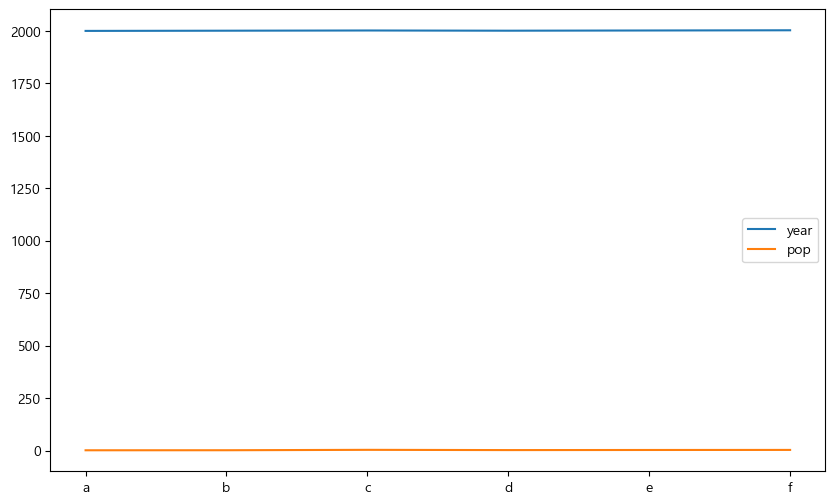

In [260]:
# 7. plot() - 데이터 시각화
frame.plot() # 그래프

<Axes: >

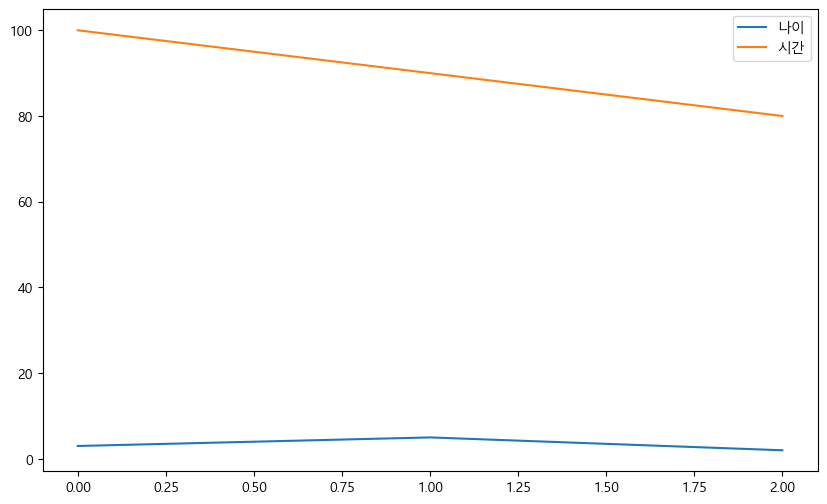

In [261]:
df2.plot()

### 3.3.3 DateFrame의 원하는 데이터만 선택하기 (p.209, 213)
* 인덱싱을 활용하여 원하는 데이터 선택
* 원하는 컬럼들만 선택
* 원하는 로우들만 선택
* 인덱싱 슬라이싱으로 특정 범위 데이터 선택
* 조건색인으로 특정 조건에 부합되는 데이터 선택

In [262]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
pd.DataFrame(data, columns=["year", "state", "pop"]) # columns을 원하는 순서대로 지정

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [263]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop"])
frame2
frame2.columns

Index(['year', 'state', 'pop'], dtype='object')

* 원하는 열(컬럼)만 조회하기

In [264]:
frame2[["year"]]

,year
0,2000
1,2001
2,2002
3,2001
4,2002
5,2003


In [265]:
# 1) state만 조회
frame2["state"]
type(frame2['state']) # Series 객체
# frame2.state

pandas.core.series.Series

In [266]:
# 2) year와 pop 조회하기 - 색인 기호 안에 조회할 2개 이상의 컬럼명들을 리스트로 작성
frame2[['year','pop']] #인덱스안에 리스트를 넣어서 찾기
frame2.index = ['a','b','c','d','e','f']

* 특정 행만 선택 - df.loc[행_레이블], df.iloc[행_위치] (p.211)

In [267]:
# 1) 2번째 행 조회
print(frame2)
frame2.loc['a']
# frame2.iloc[1]

   year   state  pop
a  2000    Ohio  1.5
b  2001    Ohio  1.7
c  2002    Ohio  3.6
d  2001  Nevada  2.4
e  2002  Nevada  2.9
f  2003  Nevada  3.2


year     2000
state    Ohio
pop       1.5
Name: a, dtype: object

* 인덱스 슬라이싱
  * 범위 값을 주고, 그 범위에 해당하는 데이터를 색인하는 방법
  * 숫자, 문자인덱스 모두 슬라이싱 가능

In [268]:
frame2

,year,state,pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,3.6
d,2001,Nevada,2.4
e,2002,Nevada,2.9
f,2003,Nevada,3.2


In [269]:
frame2.loc['a':'c'] ###!!!!! .loc를 사용시 숫자가아니라 문자로 받는다 끝나는 문자자 즉, 마이너스를 안받음

,year,state,pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,3.6


In [270]:
frame2.iloc[1:3] # 그러나 .iloc를 사용하면 슬라이싱에 의해서 3-1됨

,year,state,pop
b,2001,Ohio,1.7
c,2002,Ohio,3.6


In [271]:
frame2[1:3] # loc, iloc 생략 잘 안씀

,year,state,pop
b,2001,Ohio,1.7
c,2002,Ohio,3.6


* 2개의 인덱스를 모두 사용 색인 - 원하는 행과 열을 선택하여 조회하기
 

In [272]:
frame2

,year,state,pop
a,2000,Ohio,1.5
b,2001,Ohio,1.7
c,2002,Ohio,3.6
d,2001,Nevada,2.4
e,2002,Nevada,2.9
f,2003,Nevada,3.2


In [273]:
frame2[['year','pop']].loc['a':'e'] # 2번째부터 4번째의 year와 pop 선택 -열을 먼저 선택하고 행 선택

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
e,2002,2.9


In [274]:
frame2.loc['a':'c'][['year','pop']] # 행을 먼저 선택 후 열을 선택

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6


In [275]:
# 행과 열을 동시에 명시 특정 행/ 특정 열을 출력할 수 있음 -> 2개 이상이면 리스트에 담아서 출력 !!!!!!
frame2.loc[['a','c'], ['year','pop']]

,year,pop
a,2000,1.5
c,2002,3.6


In [276]:
frame2.loc['a':'d', ['year','pop']] # 행과 열을 동시에 슬라이싱 .loc를 사용해서 열(시리즈) 출력 가능 

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4


In [277]:
frame2.loc[:,['year', 'pop']] # 전체의 year & prop 가져오기 :-> 전체 행을 의미함

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
e,2002,2.9
f,2003,3.2


* 조건 색인

In [278]:
# pop가 2.5이상인 행 데이터 선택
# 조건 색인 (시리즈로 변환)
# 조건 색인을 사용해서 출력시 true or false
frame2['pop'] >= 2.5 
type(frame2[frame2['pop'] >= 2.5]) # 데이터 프레임에 적용
type(frame2)

pandas.core.frame.DataFrame

## 3.4 DataFrame의 산술 연산 (p.218)
* 서로 다른 색인을 가지고 있는 객체 간의 산술연산 처리

In [279]:
# 1) 1차원 데이터 간의 연산 : 짝이 맞지 않는 색인이 있는 경우 결과에 두 색인 통합된다.
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a','c','d','e'])
print(s1)
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index =['a','c','e','f','g'])
print(s2)
s1 + s2  # 서로 겹치는 색인이 없는 경우 데이터는 결측치가 된다. 추후 산술 연산 시 누락돈 값이 전달됨

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [280]:
# 2)1차원 데이터 간의 산술 연산 : 같은 색인 라벨의 값들끼리 산술 연산이 수행
sr1 = pd.Series([4500, 2800, 3000], index = ['a','b','c'])
sr2 = pd.Series([4800, 3500, 2500], index = ['b','a','c'])
sr1 + sr2

a    8000
b    7600
c    5500
dtype: int64

In [281]:
# 3) 1차원 데이터와 값 간의 연산 : series + 스칼라 (broadcasting)
sr = pd.Series([3,5,7])
sr + 10

0    13
1    15
2    17
dtype: int64

## 3.6 DataFrame 변경하기 (p. 203)
* 새로운 컬럼 추가 (p.192)
  * 고정 값 할당
  * 기존 컬럼에 함수를 적용한 결과 할당(p.226)
  * 기존 컬럼들의 산술 연산 결과 할당
* 불필요한 컬럼 또는 데이터 삭제하기(p.203)

    1) 컬럼 추가 하기 -고정 값 할당(p.192)

In [282]:
frame2["debt"] = 16.5 # 'debt' 컬럼추가 후, 값을 모두 16.5로 저장
frame2

frame2["debt"] = np.arange(6) #원본 데이터프레임의 행의 개수와 신규로 할당되는 리스트나 배열 값의 개수가 일치
frame2

frame2["debt"] = [2.3,2.7,2.6,3.4,3.9,4.2]
frame2

,year,state,pop,debt
a,2000,Ohio,1.5,2.3
b,2001,Ohio,1.7,2.7
c,2002,Ohio,3.6,2.6
d,2001,Nevada,2.4,3.4
e,2002,Nevada,2.9,3.9
f,2003,Nevada,3.2,4.2


In [283]:
# Series를 대입하면 DataFrame의 색인에 따라 값이 대입되며 존재하지 않는 색인에는 결측치가 대입됨
val = pd.Series([1,2,3,4,5,6],  index=['a','b','c','d','e','f'])
val.shape
frame2["debt"] = val  # Series 객체는 기존 데이터프레임의 shape, index 이름이 동일해야만 추가 가능
frame2

,year,state,pop,debt
a,2000,Ohio,1.5,1
b,2001,Ohio,1.7,2
c,2002,Ohio,3.6,3
d,2001,Nevada,2.4,4
e,2002,Nevada,2.9,5
f,2003,Nevada,3.2,6


In [284]:
frame2["state"] == "Ohio" # 존재하지 않는 열을 대입할 경우에는 새로운 열이 생성
# 존재하지 않는 컬럼을 만들면 새롭게
frame2["eastern"] = frame2["state"] == "Ohio" # 기존 컬럼에 조건 색인을 적용한 결과을 추가
frame2

,year,state,pop,debt,eastern
a,2000,Ohio,1.5,1,True
b,2001,Ohio,1.7,2,True
c,2002,Ohio,3.6,3,True
d,2001,Nevada,2.4,4,False
e,2002,Nevada,2.9,5,False
f,2003,Nevada,3.2,6,False


    2) 컬럼 추가하기 : 기존 컬럼에 함수를 적용한 결과로 값을 할당

In [285]:
# p.226
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.random.standard_normal((4,3)),
                     columns = ['b','d','e'],
                     index = ["Utah", "Ohio","Texas", "Oregon"])
# 각 행이나 열의 1차원 배열에 함수를 적용하기 위한 함수: DataFrame.apply(함수, axis=)
#1. 함수 정의
def f1(x):
    return x.max() - x.min()
#2. 이 함수을 각 열에 적용하기-> 열을 색인으로 하는 Series 반환
frame.apply(f1, axis = 0)
print(frame)
print(frame.apply(f1, axis = 0)) # axis = 0 열을 의미함
print(frame.apply(f1, axis = 1)) # axis = 1 행을 의미함

# 3. 이 함수을 각 행에 적용하기 -> 행을 색인으로 하는 Series 반환
#frame.apply(f1, axis = 1)

               b         d         e
Utah   -0.774581 -1.835826 -1.140105
Ohio   -0.592445  0.882003  0.778838
Texas   1.499032  1.542909 -0.447732
Oregon -1.777692 -1.791835 -1.005065
b    3.276725
d    3.378735
e    1.918943
dtype: float64
Utah      1.061245
Ohio      1.474448
Texas     1.990641
Oregon    0.786770
dtype: float64


In [292]:
# p.227
# np.random.seed(1)
print(frame)
def f2(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f2)
                     

               b         d         e
Utah   -0.774581 -1.835826 -1.140105
Ohio   -0.592445  0.882003  0.778838
Texas   1.499032  1.542909 -0.447732
Oregon -1.777692 -1.791835 -1.005065


,b,d,e
min,-1.777692,-1.835826,-1.140105
max,1.499032,1.542909,0.778838


### [Quiz] 데이터프레임 frame2에 poplevel 컬럼을 추가하고, pop이 2.5 이상이면 "high", 2.5보다 작으면 "low"로 값을 저장하기

In [318]:
frame2.index = [1,2,3,4,5,6]
frame2["poplevel"] = frame2["pop"] <= 2.5
frame2['poplevel'] = frame2['poplevel'].map({True: 'high', False: 'low'})
type(frame2)

pandas.core.frame.DataFrame

    3) 기존 컬럼들의 산술 연산 결과 할당

In [306]:
# perDebt 컬럼을 추가하고, debt을 pop의 값을 나눈 값으로 할당하기
frame2['perDebt'] = frame2['debt']/frame2['pop']
frame2

,year,state,pop,debt,eastern,poplevel,perDebt
1,2000,Ohio,1.5,1,True,high,0.666667
2,2001,Ohio,1.7,2,True,high,1.176471
3,2002,Ohio,3.6,3,True,low,0.833333
4,2001,Nevada,2.4,4,False,high,1.666667
5,2002,Nevada,2.9,5,False,low,1.724138
6,2003,Nevada,3.2,6,False,low,1.875000


In [307]:
del frame2["eastern"]
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'poplevel', 'perDebt'], dtype='object')

    5) 재색인 : reindex(리스트)

In [319]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj.reindex(["a","c","d","c","b"])

a   -5.3
c    3.6
d    4.5
c    3.6
b    7.2
dtype: float64

In [320]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [348]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3
obj3.reindex(np.arange(6), fill_value=None)
# ffill 또는 pad: 누락된 값을 직전의 유효한 값으로 채웁니다.
# bfill 또는 backfill: 누락된 값을 다음 유효한 값으로 채웁니다.
# nearest: 가장 가까운 인덱스의 값을 사용하여 채웁니다.
# None: 인덱스를 재배열할 때 누락된 값을 채우지 않습니다.


0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [349]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),
                     index=["a", "c", "d","e"],
                     columns=["Ohio", "Texas", "California","Korea"])
frame
frame2 = frame.reindex(index=["a", "d", "c", "e"])
frame2

,Ohio,Texas,California,Korea
a,0,1,2,3
d,8,9,10,11
c,4,5,6,7
e,12,13,14,15


In [360]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states).reindex(index=["a", "d", "c", "e"])
frame["Utah"] = [2,4,6,8]
frame

,Ohio,Texas,California,Korea,Utah
a,0,1,2,3,2
c,4,5,6,7,4
d,8,9,10,11,6
e,12,13,14,15,8


In [361]:
frame.reindex(states, axis=1)

,Texas,Utah,California
a,1,2,2
c,5,4,6
d,9,6,10
e,13,8,14


In [364]:
frame.loc[["a"], ["California", "Texas"]]
frame[["California", "Texas"]].loc[['a']]
frame.loc[['a'],["Utah"]]

,Utah
a,2


## # 데이터 삭제하기 :Series, DataFrame
* drop(삭제할 리스트, axis=0)
* drop(index= 행_리스트)
* drop(columns= 열_리스트)

In [394]:
obj = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
obj.name = "fox"
obj.index.name = "fox_girl"
new_obj = obj.drop("c")
new_obj
obj.drop(["d","c"])
obj.drop(["a"], axis=0)

fox_girl
b    1
c    2
d    3
e    4
Name: fox, dtype: int32

In [369]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [390]:
data.drop(index=["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [403]:
data.drop(columns=["two"])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [401]:
data.drop("Ohio", axis=0)
# data.drop(["two"], axis=1)

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## #  5주차 

In [426]:
obj = pd.Series(np.arange(4), index=["1", "b", "a", "d"])
obj
obj["1"]
obj[2:4]
obj[["b", "a", "d"]]
obj['1':'d']
obj[obj < 2]

1    0
b    1
dtype: int32

In [427]:
obj.loc[["b", "a", "d"]]

b    1
a    2
d    3
dtype: int32

In [429]:
obj1 = pd.Series([1, 2, 3], index=['2', 0, 1])
obj2 = pd.Series([1, 2, 3], index=["a", "b", "c"])
obj1
obj2
obj1[[0, 1,'2']]
# obj2[["a", "b", "c"]]

0    2
1    3
2    1
dtype: int64

In [433]:
obj1.iloc[[0, 1, 2]]
# obj2.iloc[[0, 1, 2]]

2    1
0    2
1    3
dtype: int64

In [434]:
obj2.loc["b":"c"]

b    2
c    3
dtype: int64

In [435]:
obj2.loc["b":"c"] = 5
obj2

a    1
b    5
c    5
dtype: int64

In [436]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data
data["two"]
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [437]:
data[:2]
data[data["three"] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [438]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [439]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [440]:
data
data.loc["Colorado"]

one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [441]:
data.loc[["Colorado", "New York"]]

,one,two,three,four
Colorado,0,5,6,7
New York,12,13,14,15


In [442]:
data.loc["Colorado", ["two", "three"]]

two      5
three    6
Name: Colorado, dtype: int32

In [482]:
data.iloc[2]
data.iloc[[2, 1]]
data.iloc[2, [3, 0, 1]]
data.iloc[[1, 2], [3, 0, 1]]
data

,one,two,three,four
Ohio,1,0,0,0
Colorado,1,3,3,3
Utah,5,5,5,5
New York,1,3,3,3
one,1,1,1,1


In [504]:
data11 = {"col1": ['a','b','c'],
         "cdl2" : [1,2,3]}
df = pd.DataFrame(data11)
df.loc[:'2', 'col1':'cdl2']

,col1,cdl2
0,a,1
1,b,2
2,c,3


In [499]:
data
data.loc['Ohio':'one',"one":"two"]
# data.iloc[:, :3][data.three > 5]

,one,two
Ohio,1,0
Colorado,1,3
Utah,5,5
New York,1,3
one,1,1


In [487]:
data.loc[data.three >= 4]

,one,two,three,four
Utah,5,5,5,5


In [460]:
ser = pd.Series(np.arange(3))
ser
ser[1]

1

In [461]:
ser

0    0
1    1
2    2
dtype: int32

In [462]:
ser2 = pd.Series(np.arange(3), index=["a", "b", "c"])
ser2['b']

1

In [467]:
ser.iloc[-1]

2

### ser[:2]

In [477]:
data.loc["Ohio", "one"] = 1
data
data.iloc[2] = 5
data
# data.loc[data["four"] > 5] = 3
# data

,one,two,three,four
Ohio,1,0,0,0
Colorado,1,3,3,3
Utah,5,5,5,5
New York,1,3,3,3
one,1,1,1,1


In [ ]:
data.loc[data.three == 5]["three"] = 6

In [ ]:
data

In [ ]:
data.loc[data.three == 5, "three"] = 6
data

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=["a", "c", "e", "f", "g"])
s1
s2

In [ ]:
s1 + s2

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                   index=["Utah", "Ohio", "Texas", "Oregon"])
df1
df2

In [ ]:
df1 + df2

In [ ]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})
df1
df2
df1 + df2

In [519]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list("abcde"))
df2.loc[1, "b"] = np.nan
df1
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [520]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [521]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [522]:
1 / df1
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [523]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [175]:
arr = np.arange(12.).reshape((3, 4))
arr
arr[0]
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [176]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]
frame
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [177]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [178]:
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
series2
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [179]:
series3 = frame["d"]
frame
series3
frame.sub(series3, axis="index")

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [180]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame
np.abs(frame)

,b,d,e
Utah,0.684540,1.255982,0.496726
Ohio,0.329276,0.001190,0.307293
Texas,0.183537,0.552975,0.155713
Oregon,0.572392,0.759955,0.735682


In [181]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)

b    1.256933
d    1.808957
e    1.042975
dtype: float64

In [182]:
frame.apply(f1, axis="columns")

Utah      1.940523
Ohio      0.636568
Texas     0.397262
Oregon    0.187563
dtype: float64

In [183]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])
frame.apply(f2)

,b,d,e
min,-0.684540,-0.552975,-0.307293
max,0.572392,1.255982,0.735682


In [184]:
def my_format(x):
    return f"{x:.2f}"

frame.applymap(my_format)

C:\Users\Kimjung\AppData\Local\Temp\ipykernel_1668\2705683181.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(my_format)


,b,d,e
Utah,-0.68,1.26,0.50
Ohio,0.33,-0.00,-0.31
Texas,-0.18,-0.55,-0.16
Oregon,0.57,0.76,0.74


In [185]:
frame["e"].map(my_format)

Utah       0.50
Ohio      -0.31
Texas     -0.16
Oregon     0.74
Name: e, dtype: object

In [186]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [187]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])
frame
frame.sort_index()
frame.sort_index(axis="columns")

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [188]:
frame.sort_index(axis="columns", ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [189]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [190]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [191]:
obj.sort_values(na_position="first")

1    NaN
3    NaN
4   -3.0
5    2.0
0    4.0
2    7.0
dtype: float64

In [192]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame
frame.sort_values("b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [193]:
frame.sort_values(["a", "b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [194]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [195]:
obj.rank(method="first")

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [196]:
obj.rank(ascending=False)

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

In [197]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame
frame.rank(axis="columns")

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [198]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [199]:
obj.index.is_unique

False

In [200]:
obj["a"]
obj["c"]

4

In [201]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=["a", "a", "b", "b", "c"])
df
df.loc["b"]
df.loc["c"]

0   -0.774052
1    0.610019
2   -1.547081
Name: c, dtype: float64

In [202]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"],
                  columns=["one", "two"])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [203]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [204]:
df.sum(axis="columns")

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [205]:
df.sum(axis="index", skipna=False)
df.sum(axis="columns", skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [206]:
df.mean(axis="columns")

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [207]:
df.idxmax()

one    b
two    d
dtype: object

In [208]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [209]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [210]:
obj = pd.Series(["a", "a", "b", "c"] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [211]:
price = pd.read_pickle("examples/yahoo_price.pkl")
volume = pd.read_pickle("examples/yahoo_volume.pkl")

In [212]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


In [213]:
returns["MSFT"].corr(returns["IBM"])
returns["MSFT"].cov(returns["IBM"])

8.870655479703546e-05

In [214]:
returns.corr()
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


In [215]:
returns.corrwith(returns["IBM"])

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [216]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

In [217]:
obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])

In [218]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [219]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [220]:
pd.value_counts(obj.to_numpy(), sort=False)

C:\Users\Kimjung\AppData\Local\Temp\ipykernel_1668\164454357.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj.to_numpy(), sort=False)


c    3
a    3
d    1
b    2
Name: count, dtype: int64

In [221]:
obj
mask = obj.isin(["b", "c"])
mask
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [222]:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])
unique_vals = pd.Series(["c", "b", "a"])
indices = pd.Index(unique_vals).get_indexer(to_match)
indices

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [223]:
data = pd.DataFrame({"Qu1": [1, 3, 4, 3, 4],
                     "Qu2": [2, 3, 1, 2, 3],
                     "Qu3": [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [224]:
data["Qu1"].value_counts().sort_index()

Qu1
1    1
3    2
4    2
Name: count, dtype: int64

In [225]:
result = data.apply(pd.value_counts).fillna(0)
result

C:\Users\Kimjung\AppData\Local\Temp\ipykernel_1668\1382616601.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = data.apply(pd.value_counts).fillna(0)


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [226]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0]})
data
data.value_counts()

a  b
1  0    2
2  0    2
1  1    1
Name: count, dtype: int64

In [227]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS